## Runtime Dependencies: Must Run First!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ### Bonus: Multiple Outputs Per Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Module 6: Data Visualization with Matplot

In Python, the matplotlib.pyplot library is the core API for creating data visualizations in Python!

I'm going to go over the basic plotting methods, and then some extra functionality that's good to have in the beginning.

Main Steps:

- Identify Data To Plot (X, Y, etc.)
- Call Plot Function
- Add kwargs to make it "pretty" or better

For this module, I'm assuming all data is in Pandas already!

Let's get into it!

## Module 6.1: Line Plots

The most basic plotting (and probably common) plot is going to be a line plot!

These are pretty easy, we really just need to identify X and Y!

Below, I imported a dataset for daily treasury bill rates, and used groupby to calculate an average annual rate for each year.

In [5]:
loc = "https://github.com/mhall-simon/python/blob/main/data/fred/TreasuryRatesDaily%202.xls?raw=true"

df = pd.read_excel(loc, sheet_name=1, index_col=0, parse_date=True)
df = df.groupby(df.index.year).mean()

df.head()

,DGS1,DGS10,DGS1MO,DGS2,DGS20,DGS3,DGS3MO,DGS6MO
DATE,,,,,,,,
1962,2.968808,3.779115,NaN,NaN,3.822577,3.323692,NaN,NaN
1963,3.201686,3.817586,NaN,NaN,3.863295,3.498621,NaN,NaN
1964,3.670878,3.995573,NaN,NaN,3.998588,3.846298,NaN,NaN
1965,3.955134,4.086743,NaN,NaN,4.071188,4.025364,NaN,NaN
1966,5.003500,4.735615,NaN,NaN,4.584654,5.028731,NaN,NaN


We just need to figure out X and Y!

X is going to be the year!

Y is going to be the column DGS1 for 1 Year Treasury Bills.

In [6]:
X = df.index
Y = df.DGS1

Now Let's Call Out Plotting Function!

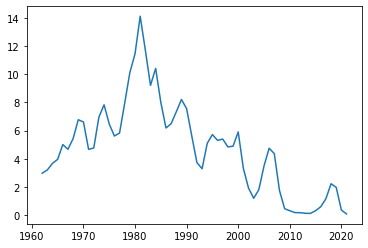

In [7]:
plt.plot(X,Y)
plt.show();

Look at that! We have a plot now! :)

## Module 6.2: Scatter Plots

Another really common plot is going to be the scatter plot!

This one is very similar to the one above, we just need our X and Y again!

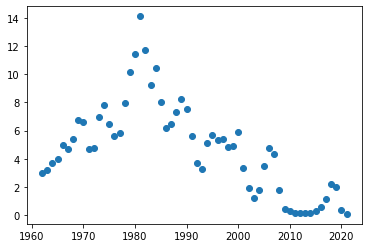

In [8]:
plt.scatter(X,Y)
plt.show();

See how helpful a line can be in identifying trends in data? This is too much at one glance!

## Module 6.3: Bar Charts

We can visualize our interest rate data as a bar chart too!

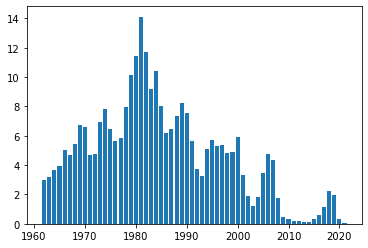

In [9]:
plt.bar(X,Y)
plt.show();

## Module 6.4: Histograms

Histograms are how we can visualize the distribution of a series of data!

They're also really easy to make. Matplot defaults to 10 bins.

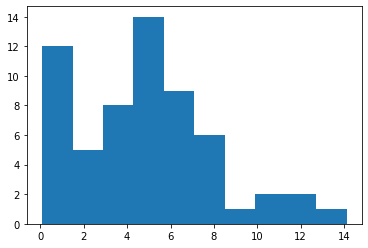

In [18]:
plt.hist(Y)
plt.show();

We can add the keyword argument `bins` in the histogram function to determine the number of groups in our data!

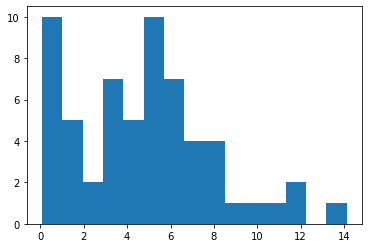

In [19]:
plt.hist(Y, bins=15)
plt.show();

Always play around with the bins to see which one works the best for your dataset!

## Module 6.5: Formatting Graphs

Right now, everything is just matplot's default blue graph!

We can pass in various keword arguments and function calls to change up the graph!

### Graph Title

We can add a title to our graph by calling the function `plt.title('string')` after our first plot and before the show!

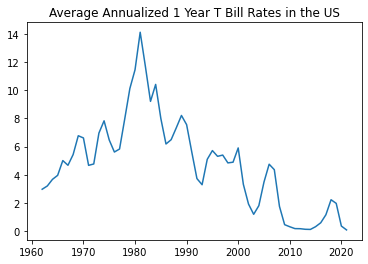

In [21]:
plt.plot(X,Y)
plt.title('Average Annualized 1 Year T Bill Rates in the US')
plt.show();

### Axes Title

We can also add a title to the axes as well!

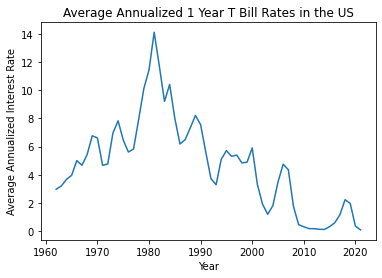

In [22]:
plt.plot(X,Y)
plt.title('Average Annualized 1 Year T Bill Rates in the US')

# Axes:
plt.xlabel('Year')
plt.ylabel('Average Annualized Interest Rate')

plt.show();

### Markers

We can change the appearance of data points in scatter and line plots easily!

To do this, we add the kwarg `marker=` to our plot call!

There's a lot of options, I'm just going to show one. See the docs for all options!

Read The Docs: https://matplotlib.org/api/markers_api.html

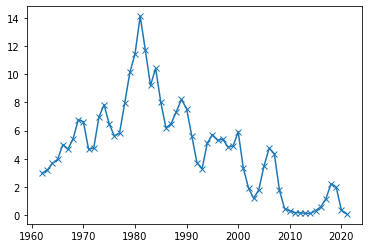

In [23]:
plt.plot(X, Y, marker='x')
plt.show();

### Legend

We can also quickly add a legend to our plot as well!

There's a few ways to do this, but I like to add the `label` kwarg to the plot call, and then show the legend with `plt.legend()`!

We can also set where the legend appears with the kwarg `loc`! Loc takes an integer 0-9!

See the docs for a full explanation!

Read the Docs: https://matplotlib.org/3.1.1/api/legend_api.html?highlight=legend#matplotlib.legend.Legend

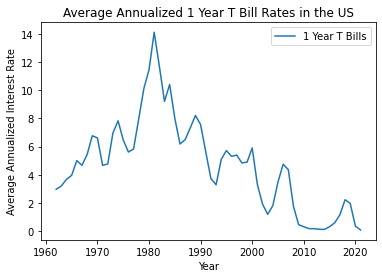

In [25]:
plt.plot(X, Y, label='1 Year T Bills')

plt.title('Average Annualized 1 Year T Bill Rates in the US')
plt.xlabel('Year')
plt.ylabel('Average Annualized Interest Rate')

# Add legend
plt.legend(loc=0)

plt.show();

### Plot Colors

Let's set a new color besides the default matplot blue!

We can do this by adding the `color` kwarg to the plot call!

You can pass an HTML color name, hexadecimal code, or RGB values!

Read the Docs: https://matplotlib.org/3.1.1/api/colors_api.html?highlight=color#module-matplotlib.colors

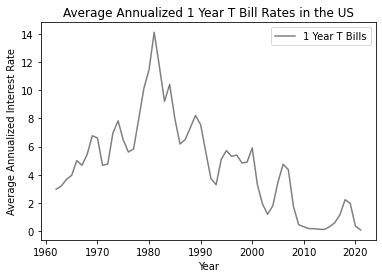

In [27]:
plt.plot(X, Y, label='1 Year T Bills', color='gray')

plt.title('Average Annualized 1 Year T Bill Rates in the US')
plt.xlabel('Year')
plt.ylabel('Average Annualized Interest Rate')
plt.legend(loc=0)

plt.show();

### Graph Size

We can change the size of the graph by first calling the `plt.figure()` function to generate a custom figure.

We add the kwarg `figsize=(x,y)` to this to set the figure size in inches. 

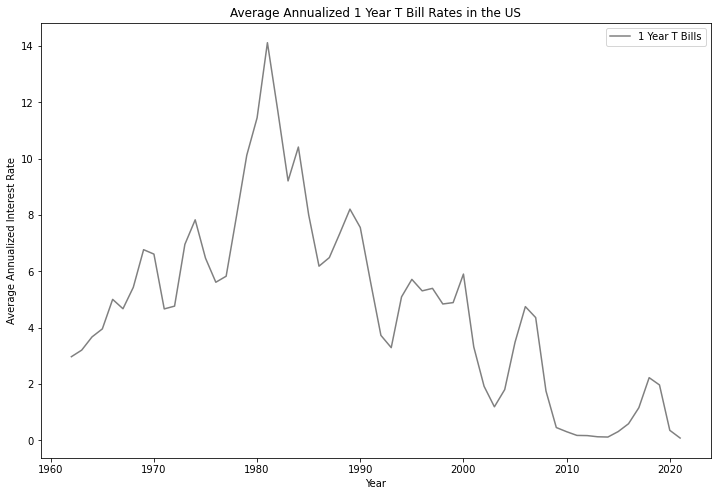

In [29]:
plt.figure(figsize=(12,8))

plt.plot(X, Y, label='1 Year T Bills', color='gray')

plt.title('Average Annualized 1 Year T Bill Rates in the US')
plt.xlabel('Year')
plt.ylabel('Average Annualized Interest Rate')
plt.legend(loc=0)

plt.show();

### Exporting Graphs

Our graphs are looking good!

Sometimes we need to export them to use in our presentations, reports, and papers!

We use the general syntax `plt.savefig('name.png')` to export them into the current working directory!

Call this before the `plt.show();` function!

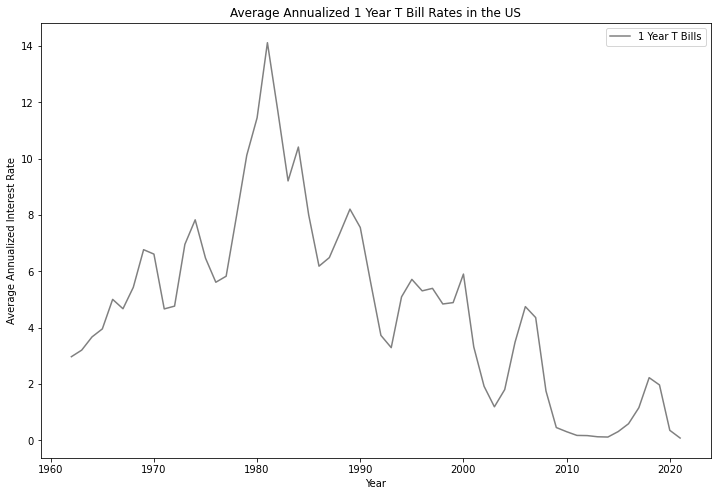

In [30]:
plt.figure(figsize=(12,8))

plt.plot(X, Y, label='1 Year T Bills', color='gray')

plt.title('Average Annualized 1 Year T Bill Rates in the US')
plt.xlabel('Year')
plt.ylabel('Average Annualized Interest Rate')
plt.legend(loc=0)

plt.savefig('1YearTBillRates.png')

plt.show();

## Module 6.6: Overlaid Plots

Right now, we're only plotting one graph at a time! We can easily overlay graphs on the same axes to show comparisons!

We do this by calling more plots before we "show" the graph.

See it in action below:

In [31]:
# Select The 3 Year T Bill Rates
Y1 = df.DGS3

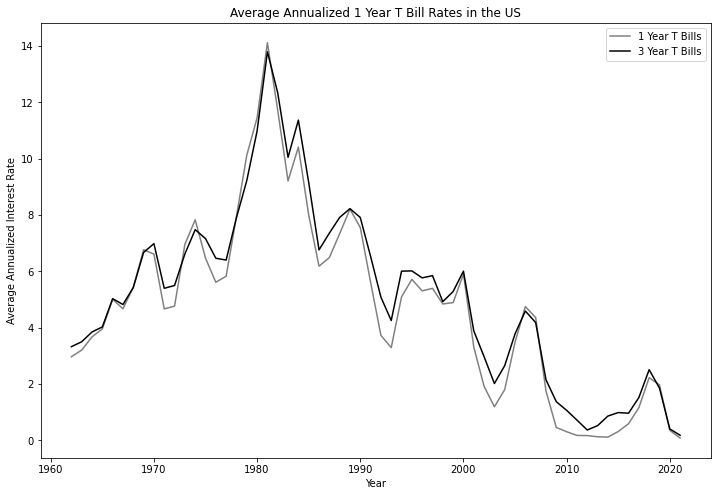

In [32]:
plt.figure(figsize=(12,8))

# Plots 1 And 2
plt.plot(X, Y, label='1 Year T Bills', color='gray')
plt.plot(X, Y1,label='3 Year T Bills', color='black')

plt.title('Average Annualized 1 Year T Bill Rates in the US')
plt.xlabel('Year')
plt.ylabel('Average Annualized Interest Rate')
plt.legend(loc=0)

plt.show();

They're pretty close, but we can see they're definitely not always the same!

## Module 6.7: Subplots

We can also generate an grid of subplots in Python!

We can generate the grid with the general syntax `fig, axs = plt.subplots(rows, cols, figsize=(x,y))`

The code below is essentially all the same, except we "paint" each subplot instead of the entire graph.

You can reduce repitition with functions if you want!

We're Going To Limit The Data To Just 2010 to date so it's easier to see!

In [46]:
data = df[df.index>=2010]

X = data.index

Y1 = data.DGS1MO
Y2 = data.DGS3MO
Y3 = data.DGS6MO
Y4 = data.DGS1
Y5 = data.DGS2
Y6 = data.DGS3
Y7 = data.DGS10
Y8 = data.DGS20

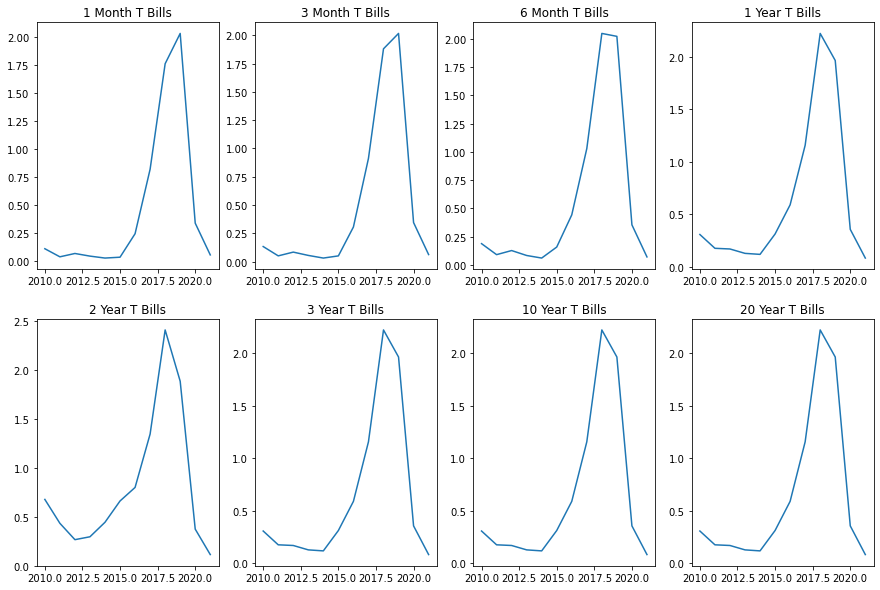

In [45]:
fig, axs = plt.subplots(2, 4, figsize=(15,10))

# Start First Subplot:
plt.subplot(2, 4, 1)
plt.plot(X, Y1)
plt.title('1 Month T Bills')

# Second
plt.subplot(2, 4, 2)
plt.plot(X, Y2)
plt.title('3 Month T Bills')

# And The Rest:
plt.subplot(2, 4, 3)
plt.plot(X, Y3)
plt.title('6 Month T Bills')

plt.subplot(2, 4, 4)
plt.plot(X, Y4)
plt.title('1 Year T Bills')

plt.subplot(2, 4, 5)
plt.plot(X, Y5)
plt.title('2 Year T Bills')

plt.subplot(2, 4, 6)
plt.plot(X, Y6)
plt.title('3 Year T Bills')

plt.subplot(2, 4, 7)
plt.plot(X, Y4)
plt.title('10 Year T Bills')

plt.subplot(2, 4, 8)
plt.plot(X, Y4)
plt.title('20 Year T Bills')

plt.show();

Compare to the alternate! Plotting Everything On One Plot:

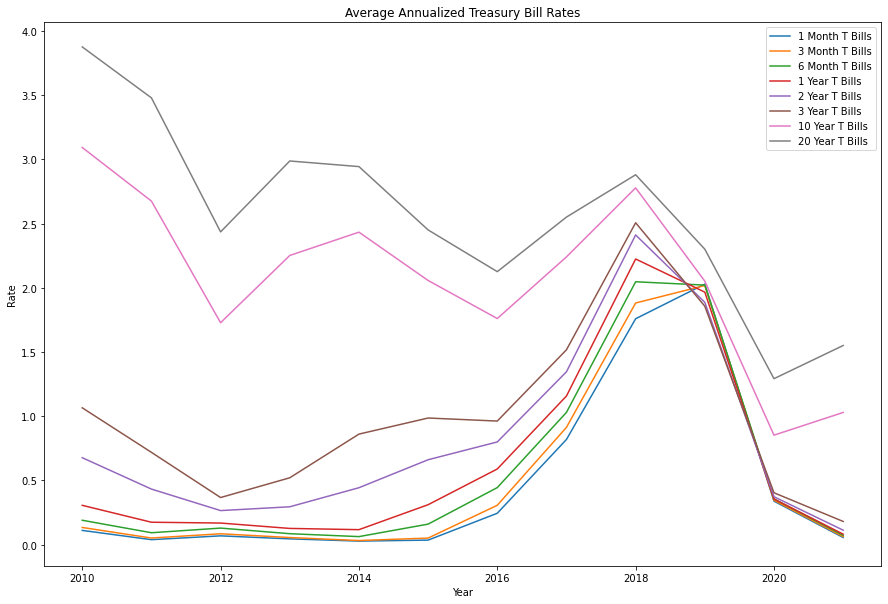

In [47]:
plt.figure(figsize=(15,10))

plt.plot(X, Y1, label='1 Month T Bills')
plt.plot(X, Y2, label='3 Month T Bills')
plt.plot(X, Y3, label='6 Month T Bills')
plt.plot(X, Y4, label='1 Year T Bills')
plt.plot(X, Y5, label='2 Year T Bills')
plt.plot(X, Y6, label='3 Year T Bills')
plt.plot(X, Y7, label='10 Year T Bills')
plt.plot(X, Y8, label='20 Year T Bills')

plt.title('Average Annualized Treasury Bill Rates')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend(loc=0)

plt.show();

There's a LOT more to plotting in matplot. There's just far too much to cover in one notebook, however, documentation is a great place to look for the countless ways you can edit these graphs.

You can do everything from change the color of the background, fonts, the ticks on the axes, and countless other changes!

Plotting is a great way to analyze data when you begin!